#라이브러리 import
- 참조코드 


1.   https://velog.io/@changhtun1/Python-Decision-Tree-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%EC%8B%A4%EC%8A%B5
2.   https://velog.io/@changhtun1/ensemble
3.  https://www.youtube.com/watch?v=4Jz4_IOgS4c



In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import check_call

In [2]:
# 트리 시각화를 위한 모듈 import
!pip install pydot

import pydot
from IPython.core.display import Image 

Defaulting to user installation because normal site-packages is not writeable
  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)


## iris 붖꽃데이터를 사용합니다 

In [3]:
iris = load_iris()
x = iris.data[:,2:] 
y = iris.target

In [4]:
print(f" X features -> {iris.feature_names} \n target class -> {iris.target_names} ")

 X features -> ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 target class -> ['setosa' 'versicolor' 'virginica'] 


In [ ]:
# 과제[1] 무엇과 무엇을 x 와 y로 설정한 것같나요? 
# x= features(sepal length, sepal width, petal length, petal width)
# y= target class(setosa vesicolor virginica로 구분)

## Model 생성 의사결정트리 분류모델 

In [6]:
# 과제 [2] decision tree 모형 인스턴스 생성 및 하이퍼파라미터(depth) = 3
 
tree_model = DecisionTreeClassifier()

# 모델을 피팅해보세요 
tree_model = tree_model.fit(x, y)

# 출력해보세요 
dot_data = export_graphviz(
    tree_model, # 학습한 모형
    out_file = None, # .dot 파일 저장 위치
    feature_names = iris.feature_names[2:], # 사용한 변수 이름
    class_names = iris.target_names, # 예측할 타겟 클래스 이름
    rounded=True, # 사각형 끝을 둥글게
    filled=True # 사각형 안 색깔 채우기
)
graph = pydot.graph_from_dot_data(dot_data)[0]
image = graph.create_png()
Image(image)

FileNotFoundError: [WinError 2] "dot" not found in path.

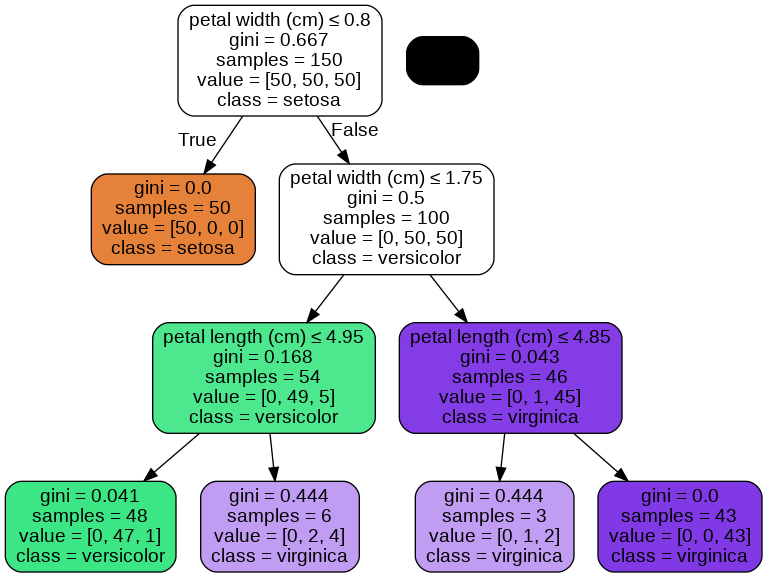

In [ ]:
# 함수로 만듦
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

draw_decision_tree(tree_model,iris.feature_names[2:], iris.target_names )

In [ ]:
#[과제3] 학습시킨 모델에서 길이가 3.1, 너비가 2 인 데이터는 어떤 클래스로 분류될지 확률값을 구해보세요 

tree_model. 

##가지치기 

In [ ]:
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋

X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
class_names = load_breast_cancer().target_names

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [ ]:
tree_not_tuned= DecisionTreeClassifier(random_state=0)

# 과제[4] 학습데이터셋에만 피팅시켜봅시다
tree_not_tuned.fit( ..... )


DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
scoring = ['f1','precision','recall']

#과제 [5] 학습 데이터에 대해 교차검증하세요) 

tree_scores = 

print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(tree_scores['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.923


max_depth : 트리 최대 깊이

max_depth 감소 => 모델 규제 증가 => 과적합 감소
min_samples_split : 분할되기 위해 노드가 가져야 하는 최소 샘플 수

min_samples_split 증가 => 모델 규제 증가 => 과적합 감소
min_samples_leaf : leaf node가 가지고 있어야할 최소 샘플 수

min_samples_leaf 증가 => 모델 규제 증가 => 과적합 감소
min_weight_fraction_leaf : min_samples_leaf와 비슷하지만, 가중치가 부여된 전체 샘플 수에서의 비율

min_weight_fraction_leaf 증가 => 모델 규제 증가 => 과적합 감소
max_leaf_nodes : leaf node의 총 최대 개수

max_leaf_nodes 감소 => 모델 규제 증가 => 과적합 감소
max_features : 최상의 분할을 찾을 때 고려할 기능의 수

max_features 감소 => 모델 규제 증가 => 과적합 감소




```
TIP : min_으로 시작하는 매개변수 증가 => 모델 규제 증가 => 과적합 감소
TIP : max_으로 시작하는 매개변수 감소 => 모델 규제 증가 => 과적합 감소
```




In [ ]:
draw_decision_tree(tree_not_tuned ,feature_names, class_names )

In [ ]:
#과제 [6] 어떻게 가지치기를 진행할 지 스스로 계획을 세우고 gridsearch를 통해 파라미터를 조정하여 다시  f1 score 를 구해봅시다! 

In [ ]:
tree_tuned = DecisionTreeClassifier( ... ) 

In [ ]:
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
# 조절하고자 하는 하이퍼파라미터들을 지정 
hyperparamters = {'위에서 고르세요 ': list(range(2, 8)),  '위에서 고르세요 ': list(range(2, 20))}

# GridSearch 진행
GridCV = GridSearchCV(estimator=tree_not_tuned, param_grid=hyperparamters, cv=5, verbose=1)

GridCV.fit(X_train, y_train)
GridCV.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

In [ ]:
#과제 [7] 다시 모델의 f1스코어를 비교해보세요 

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
scoring = ['f1','precision','recall']
#
tree_scores = cross_validate(tree_not_tuned, #학습데이터에대해 교차검증하세요)

print("parameter가 tuning 됐을 때의 F1 Score : {:.3f}".format(np.mean(tree_scores['test_f1'])))

과제[8] 계획과 해보신 결과에 대해서 말씀해주세요 

#Ensemble Method

In [ ]:
iris = load_iris()
X = iris.data[:,2:] # 꽃잎의 길이, 너비
Y = iris.target

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2021,shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 모델 선정하여 

##voting

In [ ]:
# 데이터셋 로드
iris = load_iris()
X = iris.data[:,2:] # 꽃잎의 길이, 너비
Y = iris.target
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2021,shuffle=True)

# 약한 학습기 구축
log_model = LogisticRegression() # 로지스틱회귀
rnd_model = RandomForestClassifier() #랜덤포레스트분류
svm_model = SVC() # 서포트벡터머신 
#밑에 약한학습기를 더 추가해보세요  import 하신후! 



```
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
# VotingClassifier
from sklearn.ensemble import VotingClassifier

# ensemble 할 model 정의
models = [
    ('ada', AdaBoostClassifier()),
    ('bc', BaggingClassifier()),
    ('etc',ExtraTreesClassifier()),
    ('gbc', GradientBoostingClassifier()),
    ('rfc', RandomForestClassifier()),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(probability=True)),
    ('xgb', XGBClassifier()),
    ('lgbm', LGBMClassifier()),
    ('dtc', DecisionTreeClassifier()),
    ('lr', LogisticRegressionCV()),
    ('ridge', RidgeClassifier()),
]
```





```
# 앙상블 모델 구축
# 만약에 모든 모델이 predict_proba() 메서드가 있으면, 예측의 평균을 내어 soft voting(간접 투표)도 할수 있다.
# 간접 투표 방식은 확률이 높은 투표에 비중을 두기 때문에 성능이 더 높다. (voting='soft' 사용)
# svc는 기본적으로 predict_proba를 제공하지 않아, probability = True 지정 해야 사용 가능
# 대신 svc에서 probability = True를 지정하면 교차 검증을 사용해서 확률을 추정하기 때문에 훈련 속도 느려짐
# 대신 성능을 올라감
```




In [ ]:
#과제 - 약한 학습기 추가로 구축해보세요! 위에 인자참고해서! 
# gradient boost, xgboost, 

In [ ]:
voting_model = VotingClassifier(
    estimators=[('lr',log_model),('rf',rnd_model),('svc',svm_model) ], # 3개의 약한 학습기 외 한 개 더 추가해보세요 
    voting='hard' # 직접 투표(hard voting)
)


In [ ]:
# 앙상블 모델 학습
voting_model.fit(x_train,y_train)


# 모델 비교
for model in (log_model,rnd_model,svm_model,voting_model) : 
  model.fit(x_train,y_train) #각각의 모델에 대하여 트레인 데이터 피팅 
  y_pred = model.predict(x_test)  # 예측값 
  print(model.__class__.__name__," : ",accuracy_score(y_test,y_pred))

#---- 아래로 부터는 내용정리 과제입니다--- 

##배깅 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 모델 구축
# BaggingClassifier에서 사용한 분류기가 클래스 확률추정(predict_proba)이 가능하면 자동으로 간접 투표 사용 
bag_model = BaggingClassifier(
    DecisionTreeClassifier(), # 약한 학습기(결정 트리)
    n_estimators=500, # 약한 학습기(결정 트리) 500개 생성
    max_samples=0.05, # 0.0~1.0 사이 실수 선택(실수 x 샘플 수) 혹은 샘플수 지정
    bootstrap=True, # True : 배깅, False : 페이스팅
    n_jobs=-1 # 훈련과 예측에 사용할 CPU 코어 수 (-1 : 가용한 모든 코어 사용)
)

# 모델 학습
bag_model.fit(x_train,y_train)

# 모델 예측
y_pred = bag_model.predict(x_test)

# 모델 평가
print(bag_model.__class__.__name__," : ",accuracy_score(y_test,y_pred))

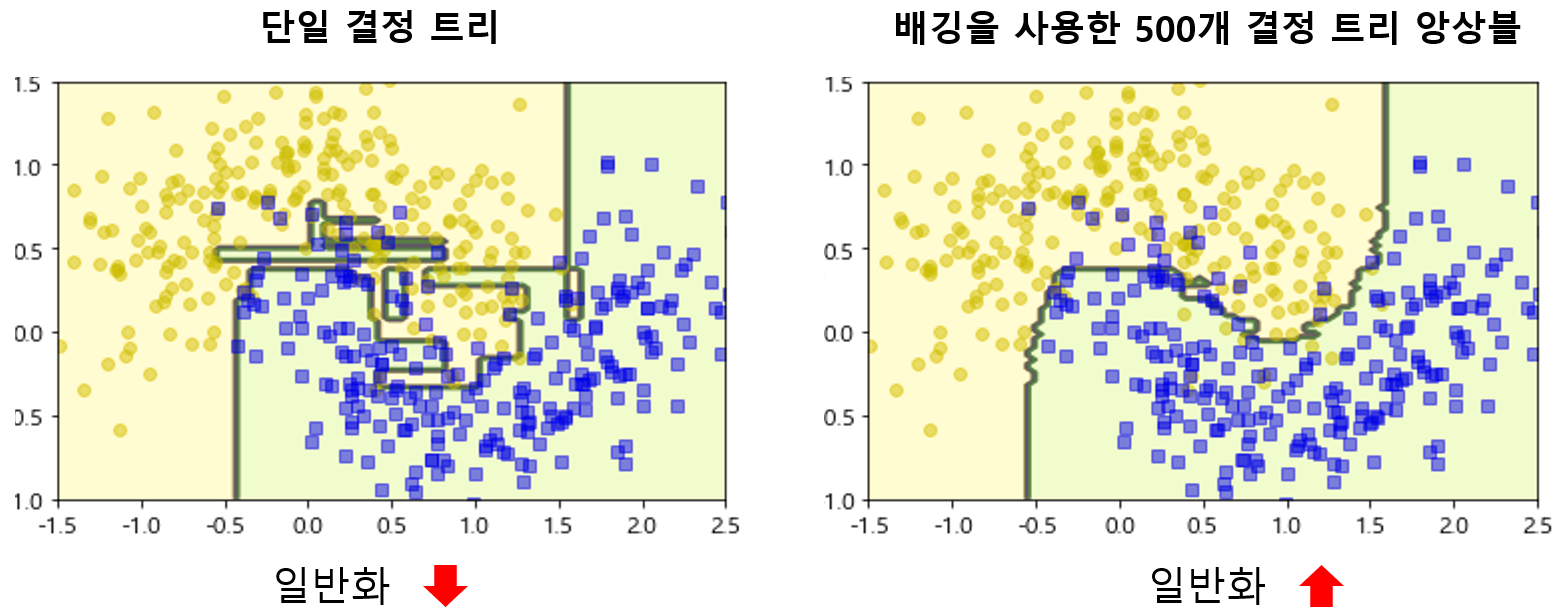

In [ ]:
# 모델 구축
bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    bootstrap = True,
    n_jobs = -1,
    oob_score = True # oob평가를 위해 True를 지정한다.
)

# 모델 학습
bag_model.fit(x_train,y_train)

# 모델 평가(oob_score_)
print('oob_score : ',bag_model.oob_score_)

# 모델 평가
y_pred = bag_model.predict(x_test)
print('test_score : ',accuracy_score(y_test,y_pred))

##배깅- RandomForest

###랜덤 포레스트의 특징 : bootstrap 으로 뽑는다, 변수중요도를 구할 수 있다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 모델 구축
rnd_model = RandomForestClassifier(
    n_estimators = 500, # 예측기 500개
    max_leaf_nodes = 16, # 자식노드의 최대 개수 
    n_jobs = -1 # CPU 코어 구동 개수
)

# 모델 학습
rnd_model.fit(x_train,y_train)

# 모델 예측
y_pred_rf = rnd_model.predict(x_test)

# 모델 평가
print("rnd_model : ",accuracy_score(y_pred_rf,y_test))


###변수중요도 확인

In [ ]:
 데이터셋 정의
x = iris.data[:,:]
y = iris.target

# 모델 구축
rnd_model = RandomForestClassifier(
    n_estimators = 500,
    n_jobs = -1
)

# 모델 학습
rnd_model.fit(x,y)

# 특성 중요도 확인 (전체 특성 중요도 합 : 1)
for feature_name,feature_imp in zip(iris['feature_names'],rnd_model.feature_importances_):
  print(feature_name,' : ',feature_imp)

##부스팅

###AdaBoost 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# 아다부스트 모델 구축
# 아다부스트의 학습기 : Decision Tree (max_depth =1) 사용
# 학습기 개수(n_estimators) : 200개
# SAMME(Stagewise Additive Modeling using a Multiclass Exponential loss function) 알고리즘 사용
# 기본 학습기가 확률 추정(predict_proba)이 가능하면 SAMME.R 사용 -> 일반적으로 성능이 더 좋음
ada_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators = 200,
    algorithm = 'SAMME.R',
    learning_rate=0.5
)

# 모델 학습
ada_model.fit(x,y)

###과제! adaboost 에 특징, 장점을 1~2 문장으로 정리해주세요

특징:


장점: 



###Gradient Boost 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 결정트리(max_depth=3) 모델 구축 및 학습
tree_reg_model_1 = DecisionTreeRegressor(max_depth=3)
tree_reg_model_1.fit(x,y)

# 첫 번째 학습기에서 발생한 잔차를 목적함수로 모델 학습
residual_1 = y - tree_reg_model_1.predict(x)
tree_reg_model_2 = DecisionTreeRegressor(max_depth=3)
tree_reg_model_2.fit(x,residual_1)

# 두 번째 학습기에서 발생한 잔차를 목적함수로 모델 학습
residual_2 = y - tree_reg_model_2.predict(x)
tree_reg_model_3 = DecisionTreeRegressor(max_depth=3)
tree_reg_model_3.fit(x,residual_2)

# 새로운 데이터를 세 개의 트리를 포함한 앙상블 모델로 예측
x_new = [[1.4,0.2]]
prediction = sum(tree.predict(x_new) for tree in [tree_reg_model_1,tree_reg_model_2,tree_reg_model_3])
prediction

###XGBoost

### 과제 !! XGboost 의 장점을 적어주세요






이곳에 적어주세요 : 

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier,XGBRegressor
from xgboost import plot_importance, plot_tree



In [ ]:
from sklearn.datasets import load_breast_cancer

cancer= load_breast_cancer()
X_train, X_test , y_train, y_test = train_test_split(cancer.data, cancer.target,test_size=0.2,random_state=100)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test,label=y_test)



In [ ]:
params = {
    'max_depth' :3 ,
    'eta' : 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'early_stopping' : 100,
    }
num_rounds=400 

In [ ]:
evals = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain ,num_boost_round=num_rounds , early_stopping_rounds=100,evals=evals)

In [ ]:
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10],3))

[0.    0.916 0.013 1.    0.997 0.997 0.014 0.    0.994 0.989]


In [ ]:
import matplotlib.pyplot as plt

###변수간 중요도 확인 가능!

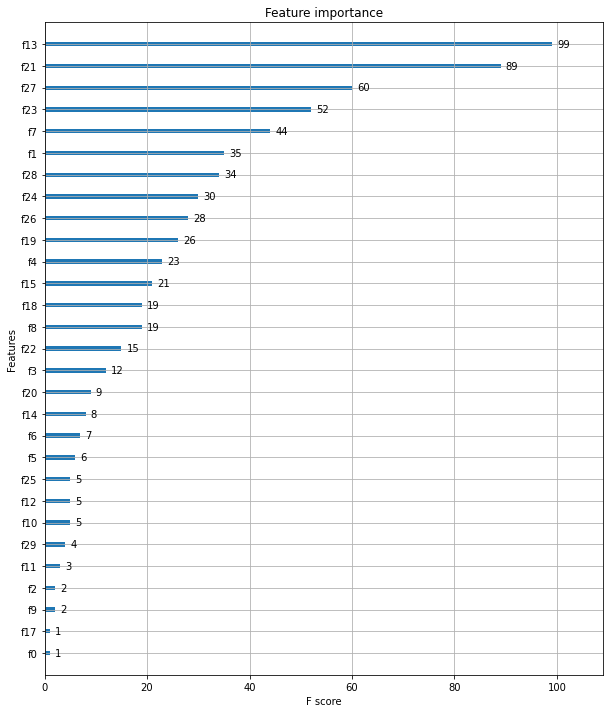

In [ ]:
fig ,ax =plt.subplots(figsize=(10,12))
plot_importance(xgb_model , ax=ax)